# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Challenge 1 - Import and Describe the Dataset

In this lab, we will use a dataset containing information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

The origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

In [2]:
# loading the data:
customers = pd.read_csv('../Wholesale customers data.csv')

customers

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [3]:
# Your code here:
customers.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [4]:
customers.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
corr = customers.corr()

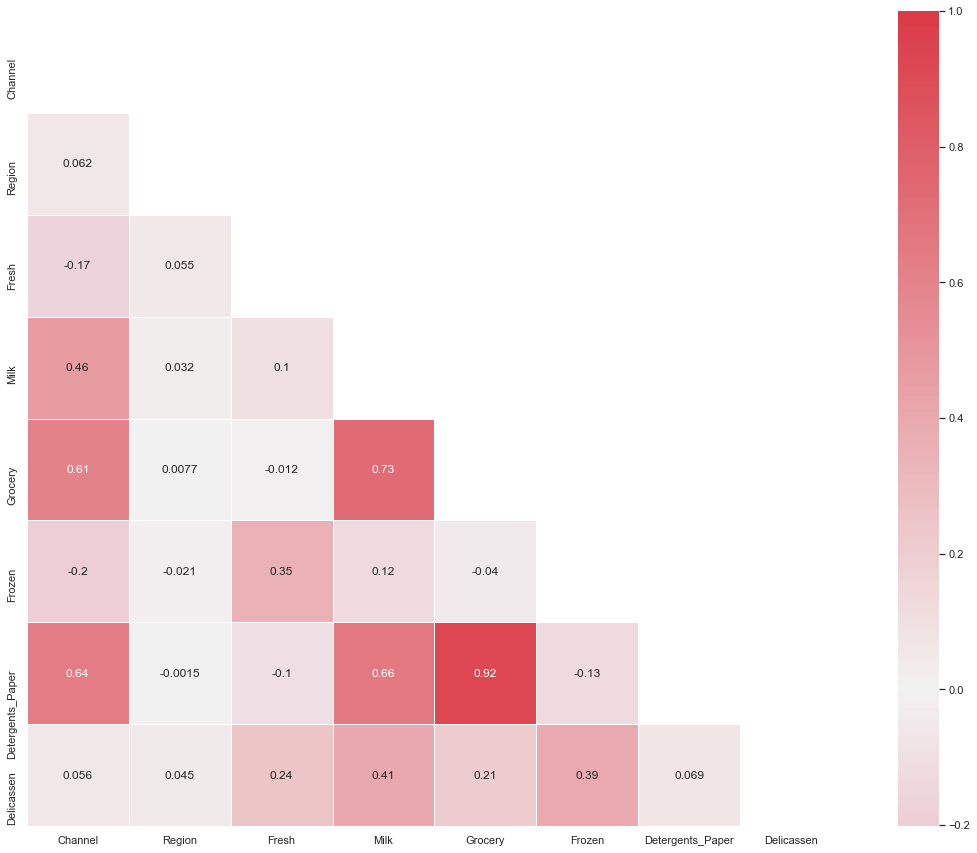

In [6]:
sns.set(style='white')   # estilo blanco
mascara=np.triu(np.ones_like(corr, dtype=bool))  # genera una mascara para la triangular superior
color_map=sns.diverging_palette(0, 10, as_cmap=True)  # paleta de colores
plt.figure(figsize=(20,15))
sns.heatmap(corr, annot = True,
           mask=mascara,
           cmap=color_map,
           vmax=1,  # limite vertical
           center=0, 
           square=True,  # datos como cuadrados
           linewidth=.5, # ancho de linea
           cbar_kws={'shrink': 1}  # barra lateral
           );

In [7]:
customers = customers.drop(['Grocery'], axis=1)

In [8]:
stats=customers.describe().T

stats['IQR']=stats['75%']-stats['25%']

stats.tail()

,count,mean,std,min,25%,50%,75%,max,IQR
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0,13806.00
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0,5657.25
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0,2812.00
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0,3665.25
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0,1412.00


In [9]:
outliers=pd.DataFrame(columns=customers.columns)

outliers

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen


In [10]:
for e in stats.index:
    
    iqr=stats.at[e, 'IQR']
    
    cutoff=1.5 * iqr
    
    lower=stats.at[e, '25%']-cutoff
    upper=stats.at[e, '75%']+cutoff
    
    res=customers[(customers[e]<lower) | (customers[e]>upper)].copy()
    
    res['outliers']=e
    outliers=outliers.append(res, sort=True)  # append de pandas no de listas
    
outliers['outliers'].value_counts()

Frozen              43
Detergents_Paper    30
Milk                28
Delicassen          27
Fresh               20
Name: outliers, dtype: int64

In [11]:
clean_index=[i for i in outliers.index if i not in outliers.index]

In [12]:
outliers=outliers.iloc[clean_index]

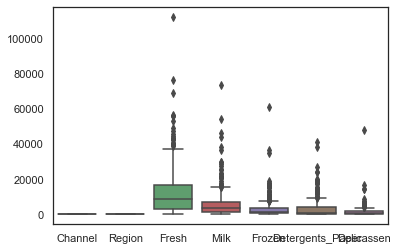

In [13]:
ax = sns.boxplot(data=customers)

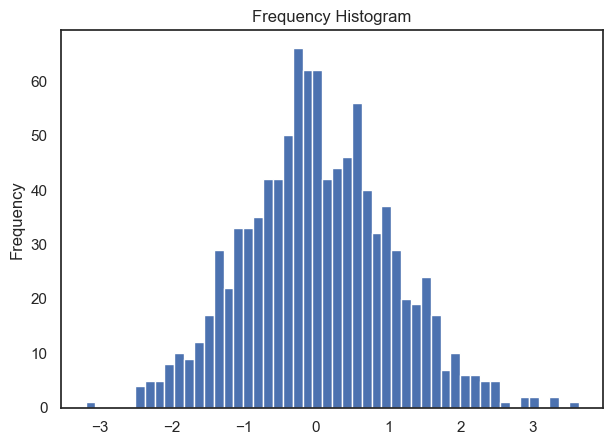

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

# Plot Histogram on x
x = np.random.normal(size = 1000)
plt.hist(x, bins=50)
plt.gca().set(title='Frequency Histogram', ylabel='Frequency');

In [15]:
# Your observations here
Column-wise data distribution - is the distribution skewed?

# No hay datos categoricos

# No hay missing data

# Hay una alta correlación de la columna Grocery, procedo a eliminar.

# Outliers borrados

Object `skewed` not found.


# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.

In [16]:
# Your code here

In [17]:
# Your comment here

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [18]:
# Your import here:

from sklearn.preprocessing import StandardScaler

In [19]:
# Your code here:

cs= pd.DataFrame(StandardScaler().fit_transform(customers), columns=customers.columns)

cs.head()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,0.173859,-0.231918,1.299347


# Challenge 3 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [20]:
# Your code here:
from sklearn.cluster import KMeans

kmeans_4 =KMeans(n_clusters=4)

In [21]:
kmeans_4.fit(cs)

KMeans(n_clusters=4)

In [22]:
customers['labels_4'] = kmeans_4.labels_

In [23]:
customers.head()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,labels_4
0,2,3,12669,9656,214,2674,1338,3
1,2,3,7057,9810,1762,3293,1776,3
2,2,3,6353,8808,2405,3516,7844,3
3,1,3,13265,1196,6404,507,1788,2
4,2,3,22615,5410,3915,1777,5185,3


In [24]:
cs['labels_4'] = kmeans_4.labels_

Count the values in `labels`.

In [25]:
# Your code here:

print(customers['labels_4'].value_counts())

2    209
3    133
0     90
1      8
Name: labels_4, dtype: int64


In [26]:
customers_spider = customers.groupby('labels_4').mean()
customers_spider

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen
labels_4,,,,,,,
0,1.044444,1.311111,12291.088889,3238.244444,3463.944444,810.755556,1161.377778
1,1.625000,2.875000,40942.250000,42388.375000,16543.875000,15320.625000,11369.250000
2,1.000000,3.000000,13297.947368,3168.306220,3436.971292,769.392344,1262.511962
3,2.000000,2.639098,8023.488722,9455.879699,1422.684211,6853.541353,1590.977444


IndexError: index 4 is out of bounds for axis 0 with size 4

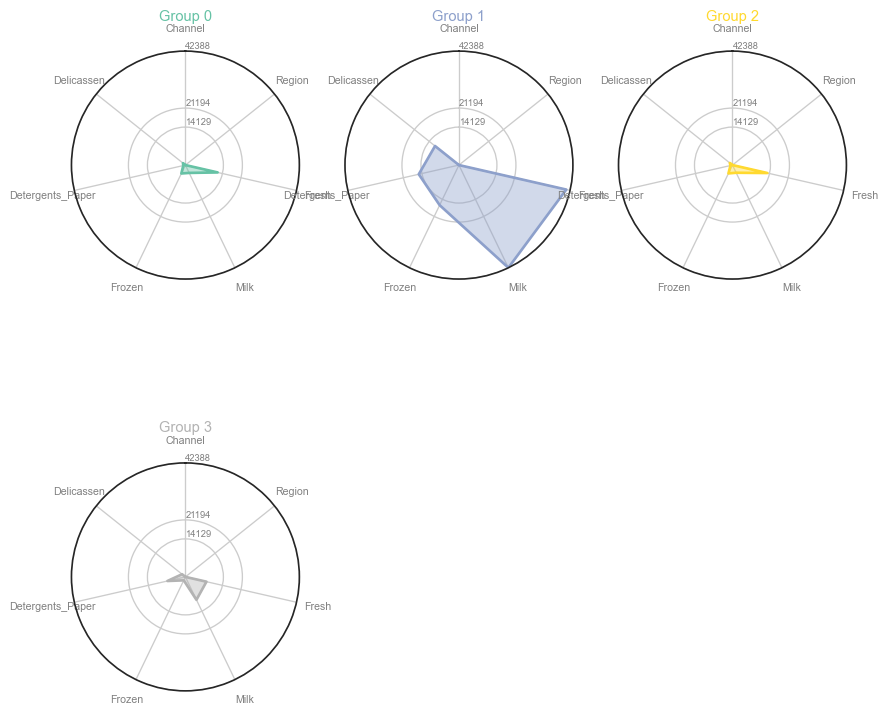

In [27]:
from math import pi
def make_spider( row, title, color):
    # number of variable
    categories=list(customers_spider)
    N = len(categories)
 
    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
 
    # Initialise the spider plot
    ax = plt.subplot(2,3,row+1, polar=True)

    # If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

    # Draw ylabels
    ax.set_rlabel_position(0)
    m = round(customers_spider.max().max())
    y_ticks = [round(m/3),round(m/2),m]
    plt.yticks(y_ticks, [str(t) for t in y_ticks], color="grey", size=7)
    plt.ylim(0,m)

    # Ind1
    values=customers_spider.loc[row].values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=11, color=color, y=1.1)
    
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(customers_spider.index))
 
# Loop to plot
for row in range(0, len(customers.index)):
    make_spider(row=row, title='Group '+ str(customers_spider.index[row]), color=my_palette(row))

# Challenge 4 - Data Clustering with AgglomerativeClustering

Now let's cluster the data using AgglomerativeClustering. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_AC']`. Now your original data have two labels, one from K-Means and the other from AgglomerativeClustering.

In [28]:
from sklearn.datasets import make_moons

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering as AC

In [30]:
customers.head()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,labels_4
0,2,3,12669,9656,214,2674,1338,3
1,2,3,7057,9810,1762,3293,1776,3
2,2,3,6353,8808,2405,3516,7844,3
3,1,3,13265,1196,6404,507,1788,2
4,2,3,22615,5410,3915,1777,5185,3


In [34]:
cluster = AC().fit(cs)

In [35]:
customers['labels_AC'] = cluster.labels_ 

In [36]:
customers.head()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,labels_4,labels_AC
0,2,3,12669,9656,214,2674,1338,3,1
1,2,3,7057,9810,1762,3293,1776,3,1
2,2,3,6353,8808,2405,3516,7844,3,1
3,1,3,13265,1196,6404,507,1788,2,0
4,2,3,22615,5410,3915,1777,5185,3,1


Count the values in `labels_AC`.

In [37]:
# Your code here

customers['labels_AC'].value_counts()

0    303
1    137
Name: labels_AC, dtype: int64

# Challenge 5 - Compare K-Means with AgglomerativeClustering

Now we want to visually compare how K-Means and AgglomerativeClustering have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_AC`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_AC` respectively

In [40]:
customers.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Frozen', 'Detergents_Paper',
       'Delicassen', 'labels_4', 'labels_AC'],
      dtype='object')

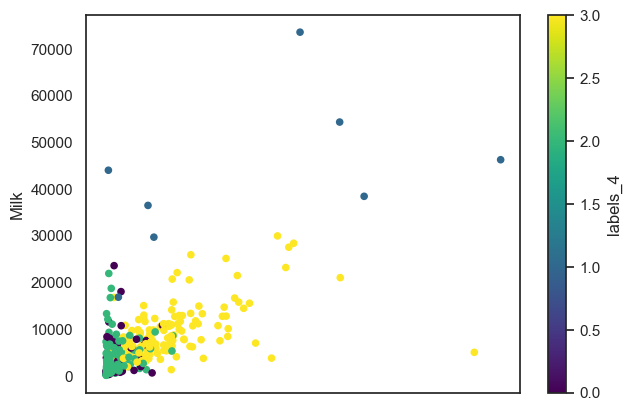

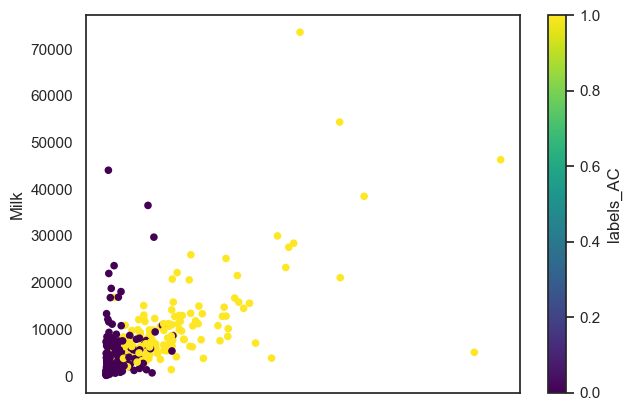

In [46]:
# Your code here:

ax1 = customers.plot.scatter(x='Detergents_Paper',
                      y='Milk',
                      c='labels_4', colormap='viridis');

ax2 = customers.plot.scatter(x='Detergents_Paper',
                      y='Milk',
                      c='labels_AC', colormap='viridis');

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_AC` respectively

In [48]:
# Your code here:

# No tengo columna grocery

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_AC` respectively

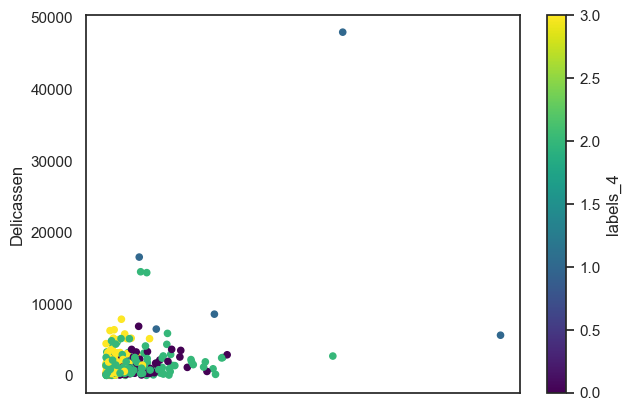

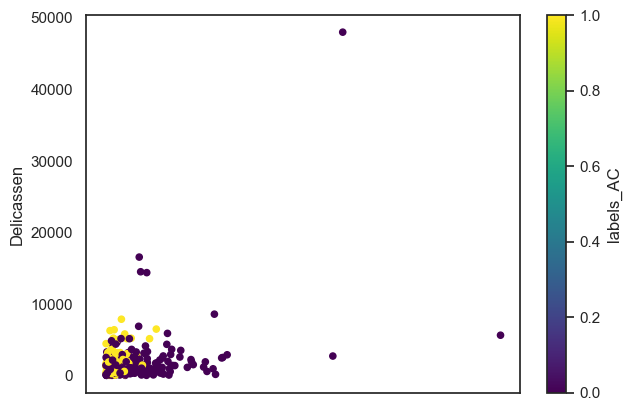

In [49]:
# Your code here:

ax3 = customers.plot.scatter(x='Frozen',
                      y='Delicassen',
                      c='labels_4', colormap='viridis');

ax4 = customers.plot.scatter(x='Frozen',
                      y='Delicassen',
                      c='labels_AC', colormap='viridis');

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_AC` respectively and compute the means for all columns.

In [52]:
# Your code here:

customers.groupby('labels_4').mean()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,labels_AC
labels_4,,,,,,,,
0,1.044444,1.311111,12291.088889,3238.244444,3463.944444,810.755556,1161.377778,0.0
1,1.625000,2.875000,40942.250000,42388.375000,16543.875000,15320.625000,11369.250000,0.5
2,1.000000,3.000000,13297.947368,3168.306220,3436.971292,769.392344,1262.511962,0.0
3,2.000000,2.639098,8023.488722,9455.879699,1422.684211,6853.541353,1590.977444,1.0


In [51]:
customers.groupby('labels_AC').mean()

,Channel,Region,Fresh,Milk,Frozen,Detergents_Paper,Delicassen,labels_4
labels_AC,,,,,,,,
0,1.016502,2.495050,13510.089109,3565.683168,3793.346535,807.151815,1475.293729,1.392739
1,2.000000,2.649635,8661.124088,10729.598540,1476.394161,7469.270073,1634.518248,2.941606


Which algorithm appears to perform better?

In [ ]:
# Your observations here

# Según mis observaciones, el mejor algoritmo es la clasterización por AgglomerativeClustering 

# ya que nos permite identificar dos grupos de manera más logica.

# Bonus Challenge 2 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with AgglomerativeClustering because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 3 - Changing AgglomerativeClustering linkage criteria

Experiment changing the linkage param in AgglomerativeClustering.

In [ ]:
# Your code here

In [ ]:
# Your comment here